*© copyright information: *<br>
*Modified from:*<br>
*- likegeeks.com/python-correlation-matrix/* <br> 
*Notebook for course: Data Sciences for Energy-Efficient Design 2022 SoSe in Leibniz Universität Hannover* <br>
*MIT license*

# What is the correlation matrix?

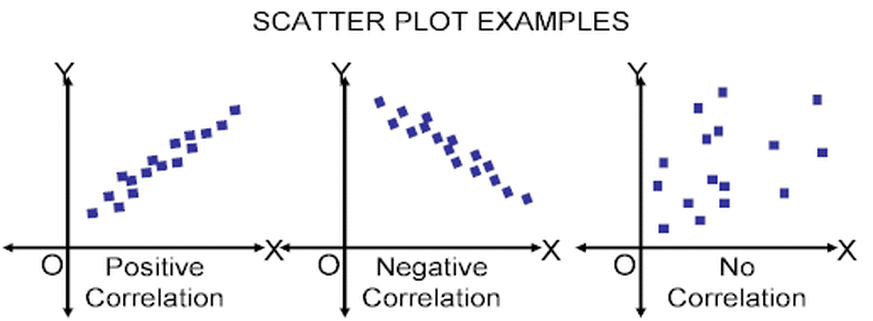

A correlation matrix is a tabular data representing the ‘correlations’ between pairs of variables in a given data.<Br>
An example is made based on [California Housing Data Set](https://developers.google.com/machine-learning/crash-course/california-housing-data-description) 

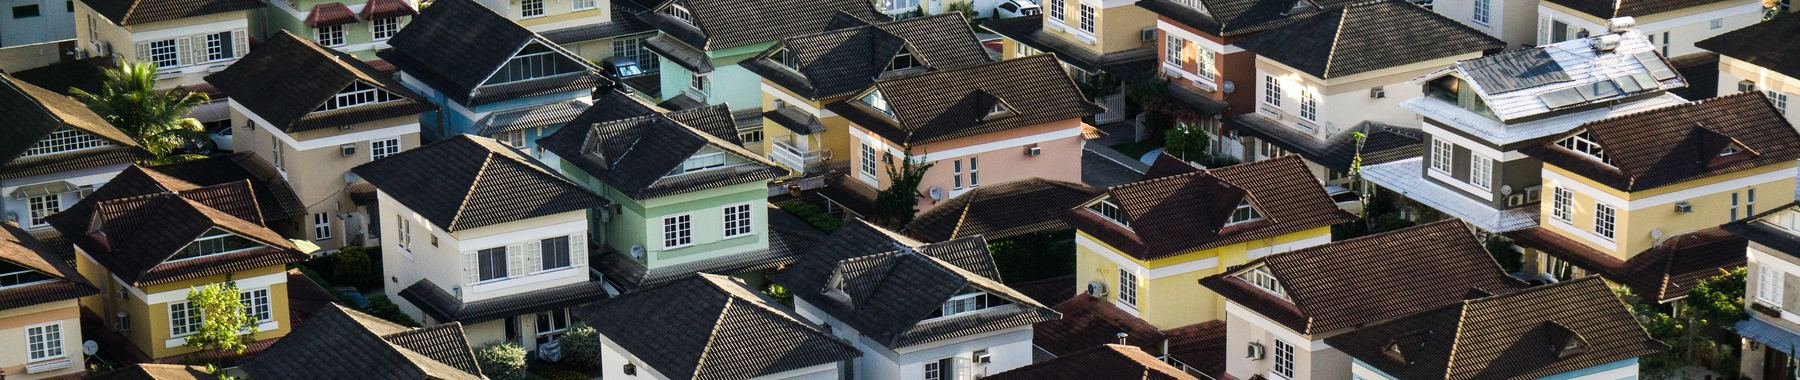

In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# load the sample data
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()
X, y = dataset.data, dataset.target # we will take the first column as the example later
# make X,y into a DataFrame
data = pd.DataFrame(X, columns=dataset.feature_names)
data['MedHouseVal'] = y
data

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]

In [3]:
corr = data.corr()
corr

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.013344    -0.046701  
Population  -0.108785   0.099773    -0.024650  
AveOccup     0.002366   0.002476    -0.023737  
Latitude     1.000000  -0.924664    -0.144160  
Longitude   -0.924664   1.000000    -0.045967  
MedHouseVal -0.144160  -0.045967     1.000000

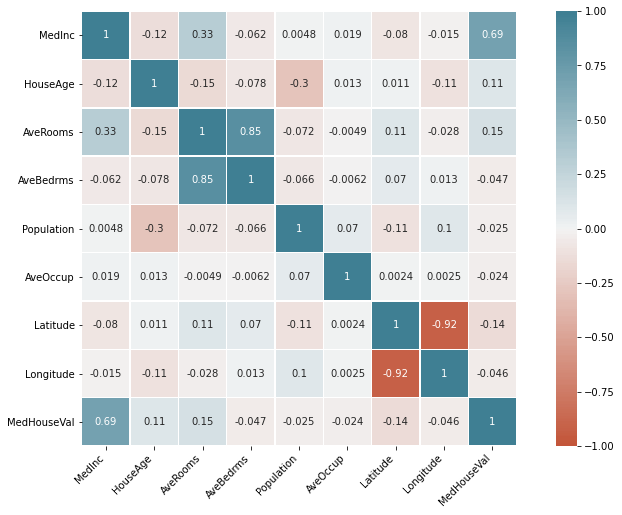

In [2]:
corr = data.corr()

# setting figure size in inches
fig = plt.figure(figsize = (14, 8))
# Get the current Axes instance on the current figure matching the given keyword args
ax = fig.gca()

# correlation matrix
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    linewidths=.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

- Each row and column represents a variable, and each value in this matrix is the **correlation coefficient** between the variables represented by the corresponding row and column.

- The Correlation matrix is an important data analysis metric that is computed to summarize data to **understand the relationship between various variables and make decisions accordingly**.

- It is also an **important pre-processing step in Machine Learning pipelines** to compute and analyze the correlation matrix where dimensionality reduction is desired on a high-dimension data.

- We mentioned how each cell in the correlation matrix is a ‘correlation coefficient‘ between the two variables corresponding to the row and column of the cell.

# What is the correlation coefficient?

A correlation coefficient is a number that denotes the strength of the relationship between two variables.
<br>
There are several types of correlation coefficients, but the most common of them all is the **Pearson’s coefficient denoted by the Greek letter ρ (rho)**.<br>
It is defined as the **covariance between two variables divided by the product of the standard deviations of the two variables**.

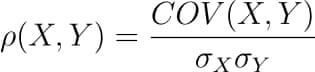

Where the covariance between X and Y **COV(X, Y)** is further defined as the ‘**expected value of the product of the deviations of X and Y from their respective means**’.
The formula for covariance would make it clearer.

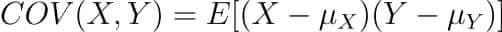

So the formula for Pearson’s correlation would then become:

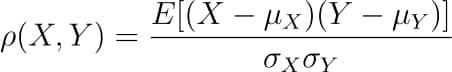

Features of Pearson's correlation:<br>
- The value of ρ lies between -1 and +1.
- Values nearing +1 indicate the presence of a strong positive relation between X and Y, whereas those nearing -1 indicate a strong negative relation between X and Y.
- Values near to zero mean there is an absence of any relationship between X and Y.

# Finding the correlation matrix of the given data

In [11]:
corr

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.013344    -0.046701  
Population  -0.108785   0.099773    -0.024650  
AveOccup     0.002366   0.002476    -0.023737  
Latitude     1.000000  -0.924664    -0.144160  
Longitude   -0.924664   1.000000    -0.045967  
MedHouseVal -0.144160  -0.045967     1.000000

- Since we compute the correlation matrix of 9 variables, its dimensions are 9 x 9.<br>
- The value 0.02 indicates there doesn’t exist a relationship between Longitude and AveRooms. This was expected by our experience.

In [12]:
# corr = data.corr()

Pandas DataFrame’s [**corr()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) method is used to compute the matrix. By default, it computes the **Pearson’s correlation coefficient.**<br>
We could also use other methods such as *Spearman’s coefficient* or *Kendall Tau correlation* coefficient by passing an appropriate value to the parameter 'method'.<br>
We’ve used seaborn’s [**heatmap()**](https://seaborn.pydata.org/generated/seaborn.heatmap.html) method to plot the matrix. The parameter ‘annot=True‘ displays the values of the correlation coefficient in each cell.<br>

# Interpreting the correlation matrix

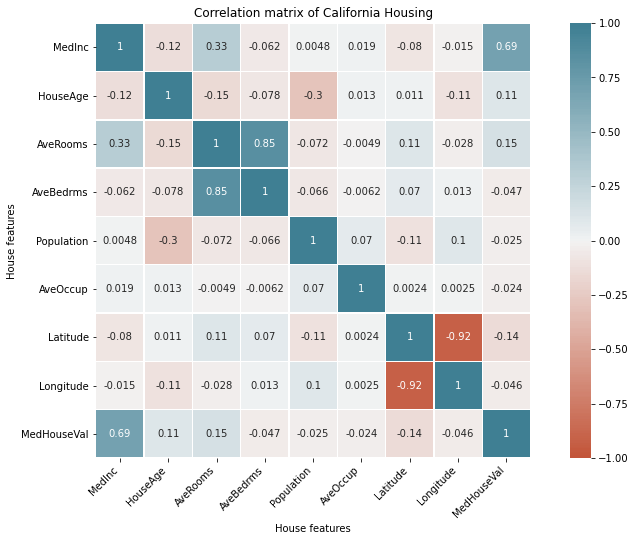

In [6]:
corr = data.corr()

# setting figure size in inches
fig = plt.figure(figsize = (14, 8))
# Get the current Axes instance on the current figure matching the given keyword args
ax = fig.gca()

# correlation matrix
# Different color options: https://seaborn.pydata.org/tutorial/color_palettes.html
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    linewidths=.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Give title
plt.title("Correlation matrix of California Housing")

plt.xlabel("House features")

plt.ylabel("House features")
## Saving Figure
plt.savefig("Cal_Housing_correlation.png")
plt.show()

## Sorting the correlation matrix

If the given data has a large number of features, the correlation matrix can become very big and hence difficult to interpret.<br>
Sometimes we might want to sort the values in the matrix and see the strength of correlation between various feature pairs in an increasing or decreasing order.

The [**unstack**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html) method on the Pandas DataFrame returns a Series with MultiIndex.That is, each value in the Series is represented by more than one indices, which in this case are the row and column indices that happen to be the feature names.

In [9]:
corr_pairs = corr.unstack()
corr_pairs

MedInc       MedInc         1.000000
             HouseAge      -0.119034
             AveRooms       0.326895
             AveBedrms     -0.062040
             Population     0.004834
                              ...   
MedHouseVal  Population    -0.024650
             AveOccup      -0.023737
             Latitude      -0.144160
             Longitude     -0.045967
             MedHouseVal    1.000000
Length: 81, dtype: float64

In [10]:
# show more rows!
pd.set_option('display.max_rows', 500)

We can sort these values using the [**sort_values()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) method of the Pandas Series.

In [11]:
corr_pairs

MedInc       MedInc         1.000000
             HouseAge      -0.119034
             AveRooms       0.326895
             AveBedrms     -0.062040
             Population     0.004834
             AveOccup       0.018766
             Latitude      -0.079809
             Longitude     -0.015176
             MedHouseVal    0.688075
HouseAge     MedInc        -0.119034
             HouseAge       1.000000
             AveRooms      -0.153277
             AveBedrms     -0.077747
             Population    -0.296244
             AveOccup       0.013191
             Latitude       0.011173
             Longitude     -0.108197
             MedHouseVal    0.105623
AveRooms     MedInc         0.326895
             HouseAge      -0.153277
             AveRooms       1.000000
             AveBedrms      0.847621
             Population    -0.072213
             AveOccup      -0.004852
             Latitude       0.106389
             Longitude     -0.027540
             MedHouseVal    0.151948
A

In [12]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
sorted_pairs

Longitude    Latitude      -0.924664
Latitude     Longitude     -0.924664
HouseAge     Population    -0.296244
Population   HouseAge      -0.296244
AveRooms     HouseAge      -0.153277
HouseAge     AveRooms      -0.153277
Latitude     MedHouseVal   -0.144160
MedHouseVal  Latitude      -0.144160
HouseAge     MedInc        -0.119034
MedInc       HouseAge      -0.119034
Latitude     Population    -0.108785
Population   Latitude      -0.108785
Longitude    HouseAge      -0.108197
HouseAge     Longitude     -0.108197
MedInc       Latitude      -0.079809
Latitude     MedInc        -0.079809
HouseAge     AveBedrms     -0.077747
AveBedrms    HouseAge      -0.077747
AveRooms     Population    -0.072213
Population   AveRooms      -0.072213
             AveBedrms     -0.066197
AveBedrms    Population    -0.066197
             MedInc        -0.062040
MedInc       AveBedrms     -0.062040
MedHouseVal  AveBedrms     -0.046701
AveBedrms    MedHouseVal   -0.046701
MedHouseVal  Longitude     -0.045967
L

## Selecting strong correlation pairs (magnitude greater than 0.5)

In [13]:
strong_pairs = sorted_pairs[(abs(sorted_pairs) > 0.5) & (abs(sorted_pairs) != 1)]

strong_pairs

Longitude    Latitude      -0.924664
Latitude     Longitude     -0.924664
MedHouseVal  MedInc         0.688075
MedInc       MedHouseVal    0.688075
AveRooms     AveBedrms      0.847621
AveBedrms    AveRooms       0.847621
dtype: float64

# Pairplot: Correlations in classification

Sometimes correlation presents more regarding numerical relationships among features. In datasets for classification, pair plots can be also handy to interpretative data characteristics. 

<AxesSubplot:>

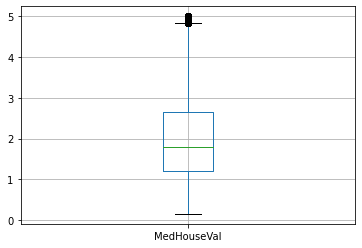

In [14]:
# check output distribution
data[['MedHouseVal']].boxplot()

E:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


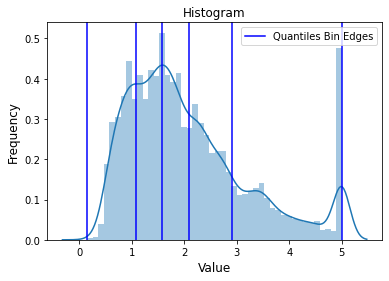

In [15]:
# use binning discretization (L03) to transfer output.
from sklearn.preprocessing import KBinsDiscretizer

# visualiza the bin edges
model = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile') # set 3 bins
# return oridinal bin number, set all bins based on quantile

model.fit(data['MedHouseVal'].values.reshape(-1,1))
transformed_output = model.transform(data['MedHouseVal'].values.reshape(-1,1)).reshape(-1)  # transform train set

# take transformed_test as demo
# transformed_test = array([4., 4., 4., 4., 2., 3., 2., 1., 0., 2.])
bin_edge = model.bin_edges_[0]


fig, ax = plt.subplots()
sns.distplot(data[['MedHouseVal']], hist = True, kde=True)

for edge in bin_edge: # quantile based bins
    line = plt.axvline(edge, color='b')
ax.legend([line], ['Quantiles Bin Edges'], fontsize=10)
ax.set_title('Histogram', fontsize=12)
ax.set_xlabel('Value', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12); 

In [17]:
data_classificationo = data.copy()
data_classificationo['MedHouseVal'] = transformed_output
data_classificationo

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23          4.0  
1        -122.22          4.0  
2        -122.24          4.0  
3        -122.25          4.0  
4        -122.25          4.0  
...          ...          ...  
20635    -121.09          0.0  
20636    -121.21          0.0  
20637    -121.22          0.0  
20638    -121.32          0.0  
20639    -121.24          0.0  

[20640 rows x 9 columns]

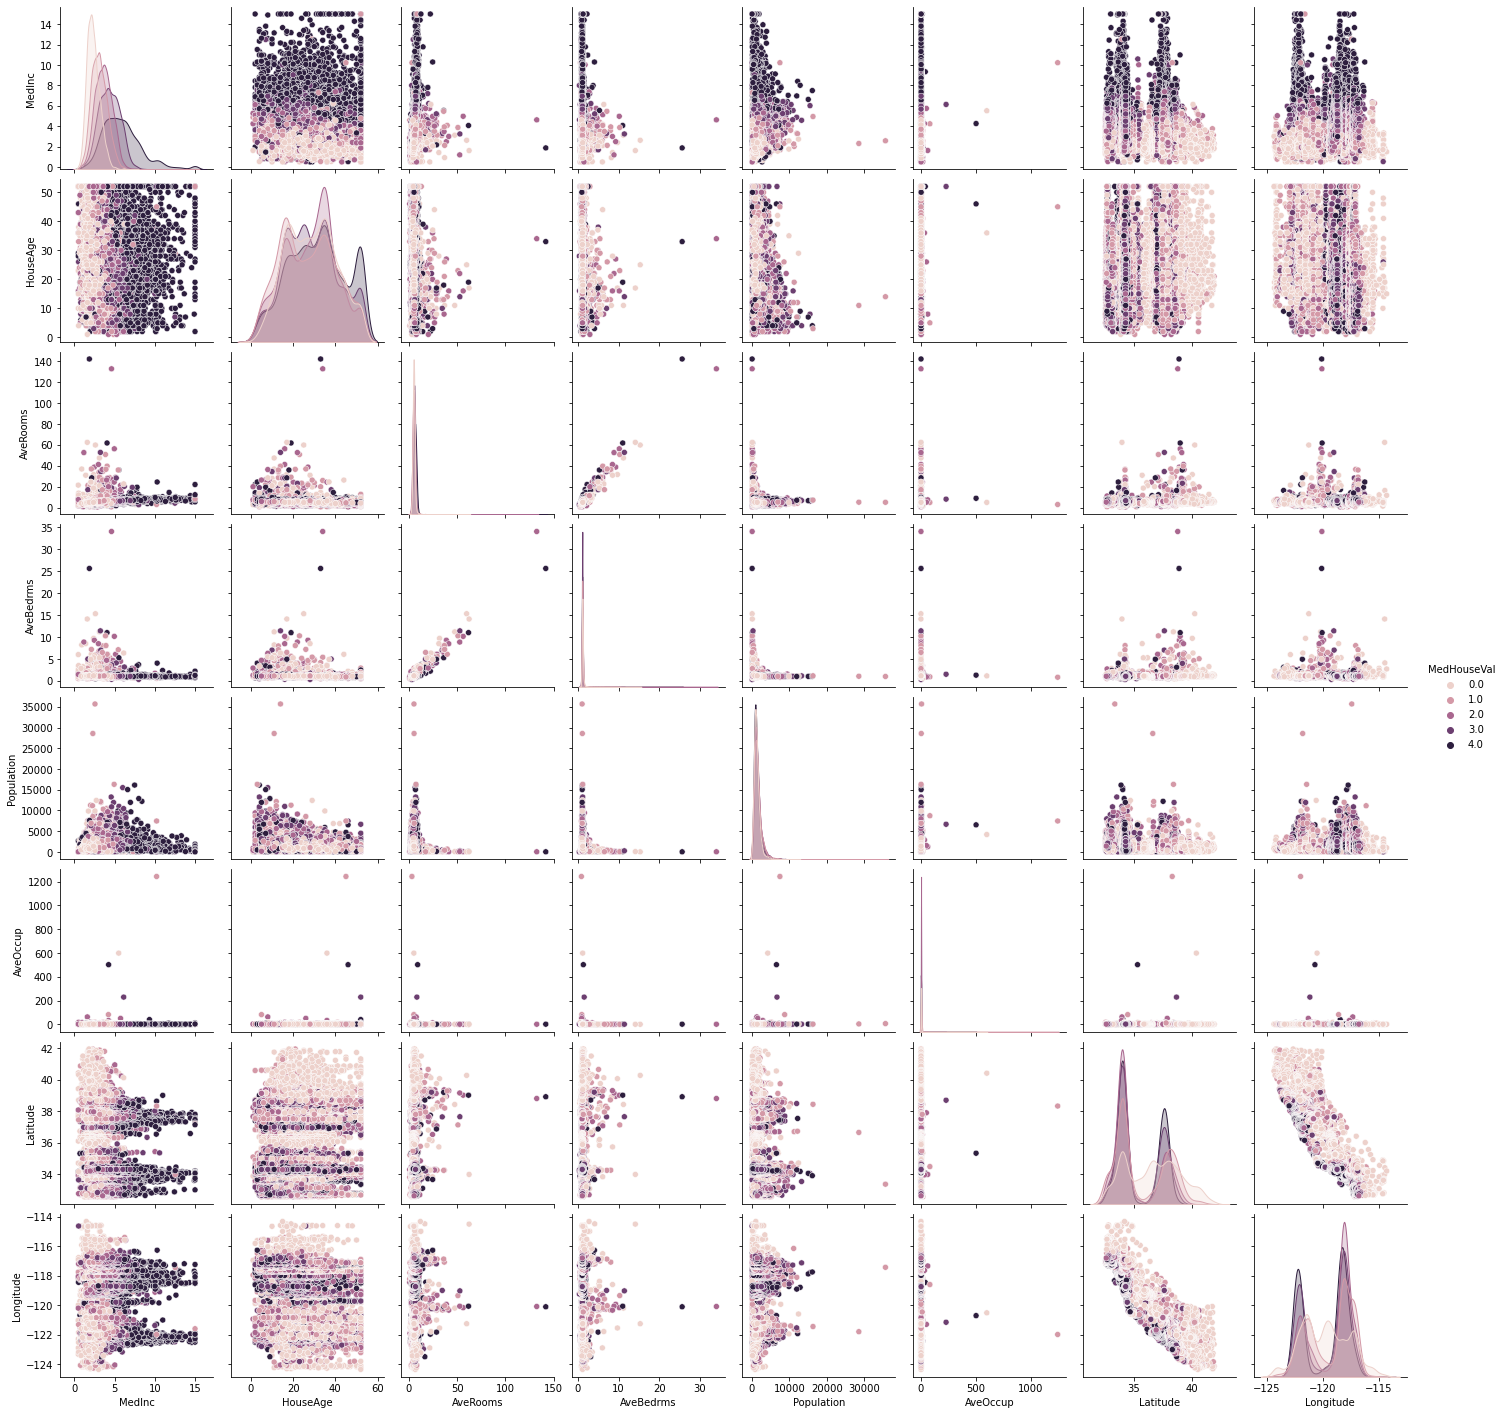

In [46]:
fig = sns.pairplot(data=data_classificationo, 
                   hue='MedHouseVal')
plt.show()

Keep the following points in mind with regards to the correlation matrices such as the one shown above:

1. Each cell in the grid represents the value of the correlation coefficient between two variables.
2. The value at position (a, b) represents the correlation coefficient between features at row a and column b. This will be equal to the value at position (b, a)
3. It is a **square** matrix – each row represents a variable, and all the columns represent the same variables as rows, hence the number of rows = number of columns.
4. It is a **symmetric** matrix – this makes sense because the correlation between a,b will be the same as that between b, a.
5. All **diagonal elements are 1**. Since diagonal elements represent the correlation of each variable with itself, it will always be equal to 1.
6. The axes ticks denote the feature each of them represents.
7. A **large positive value (near to 1.0) indicates a strong positive correlation**, i.e., if the value of one of the variables increases, the value of the other variable increases as well.
8. A **large negative value (near to -1.0) indicates a strong negative correlation**, i.e., the value of one variable decreases with the other’s increasing and vice-versa.
9. A **value near to 0 (both positive or negative) indicates the absence of any correlation** between the two variables, and hence those variables are independent of each other.
10. Each cell in the above matrix is also represented by shades of a color. Here darker shades of the color indicate smaller values while brighter shades correspond to larger values (near to 1).
11. This scale is given with the help of a color-bar on the right side of the plot.

# Causality: Let us answer "what if" question.

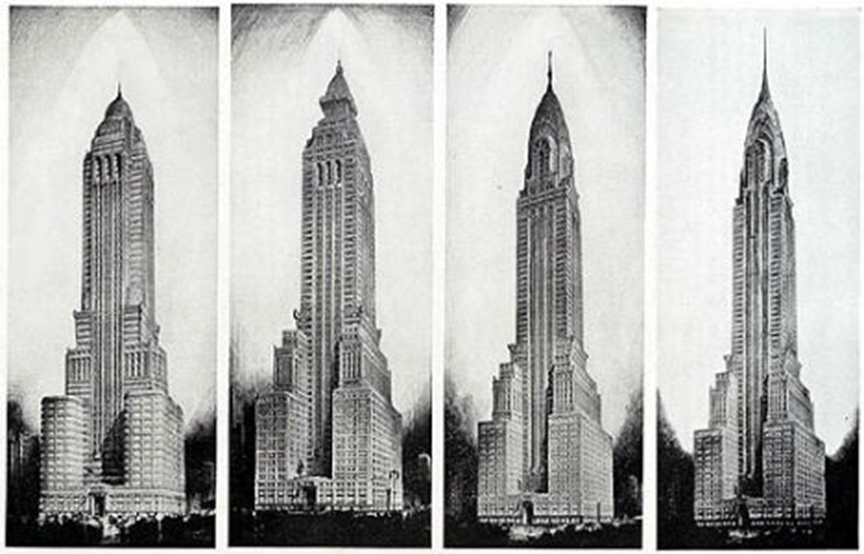

In [ ]:
# (images via: sleepny, wikimedia commons)

Causality is the **science of cause and effect**. Things influence other things.<br>
To answer what if question, we need to (make machine) understand the relationship of causality. Otherwise, we might get wrong conclusion.

**Case i: Chocolate consumption and Nobel Prizes winners**

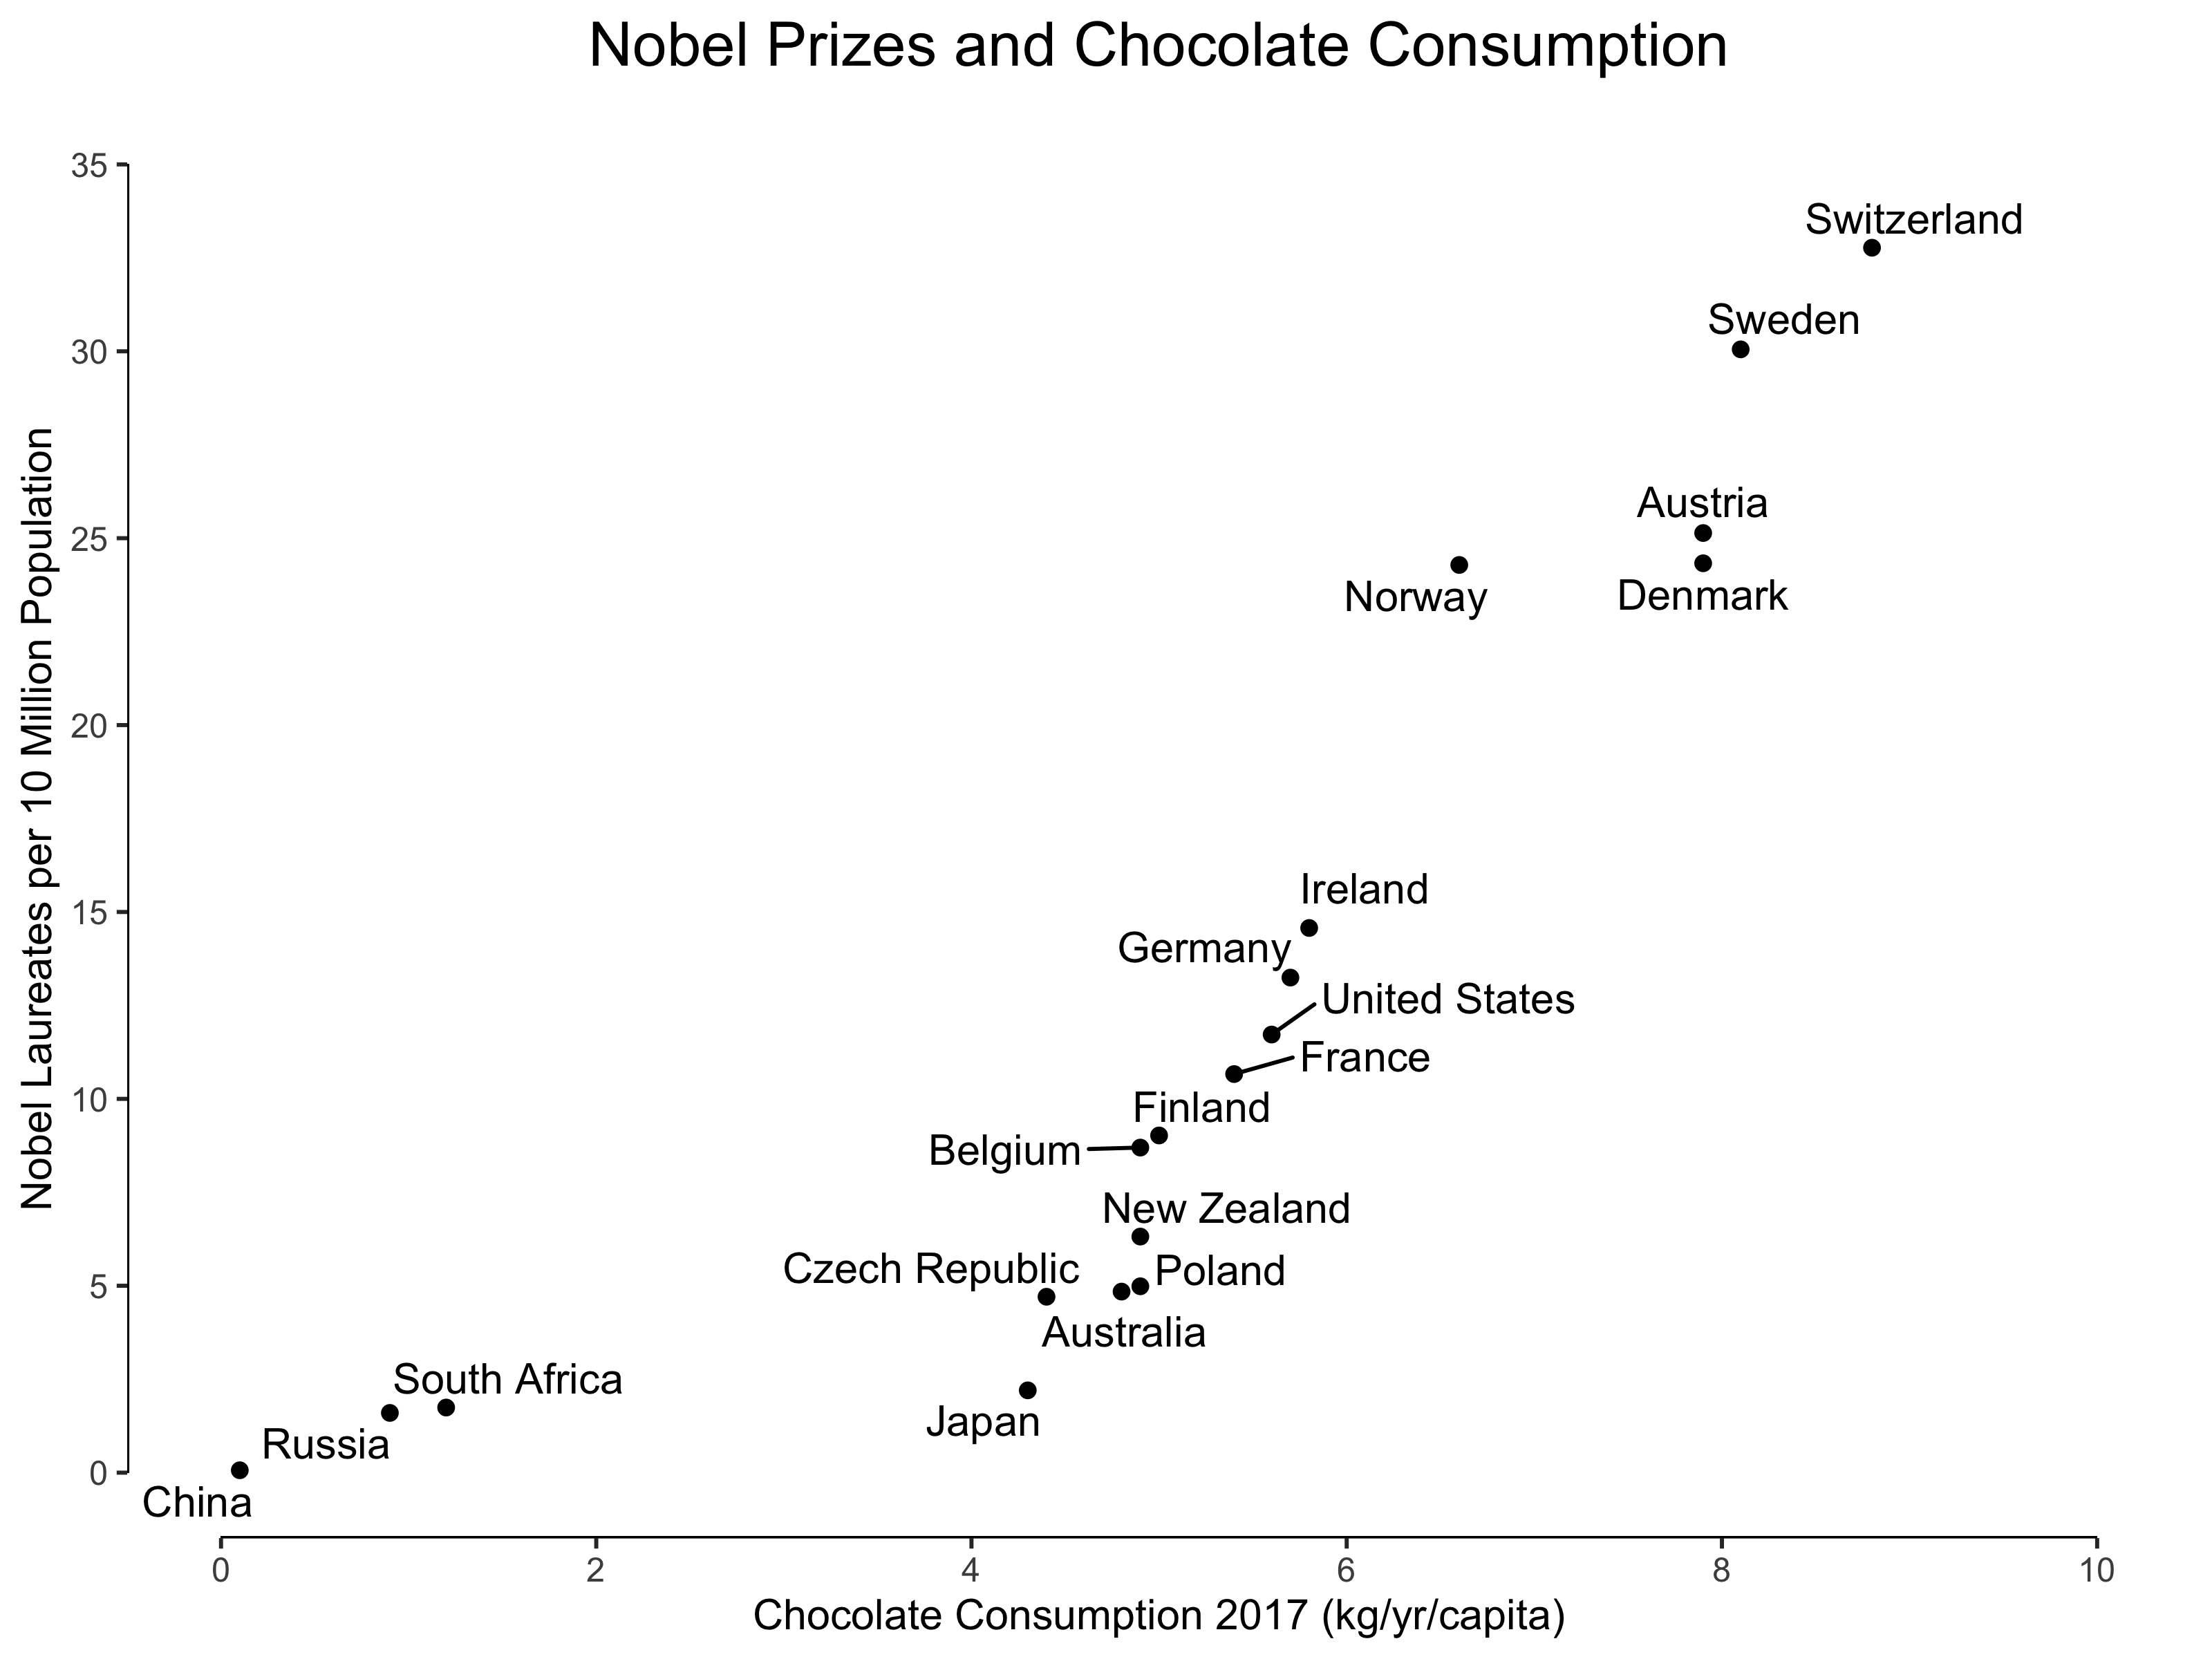

**Case ii: Ice cream sales and shark attacks**

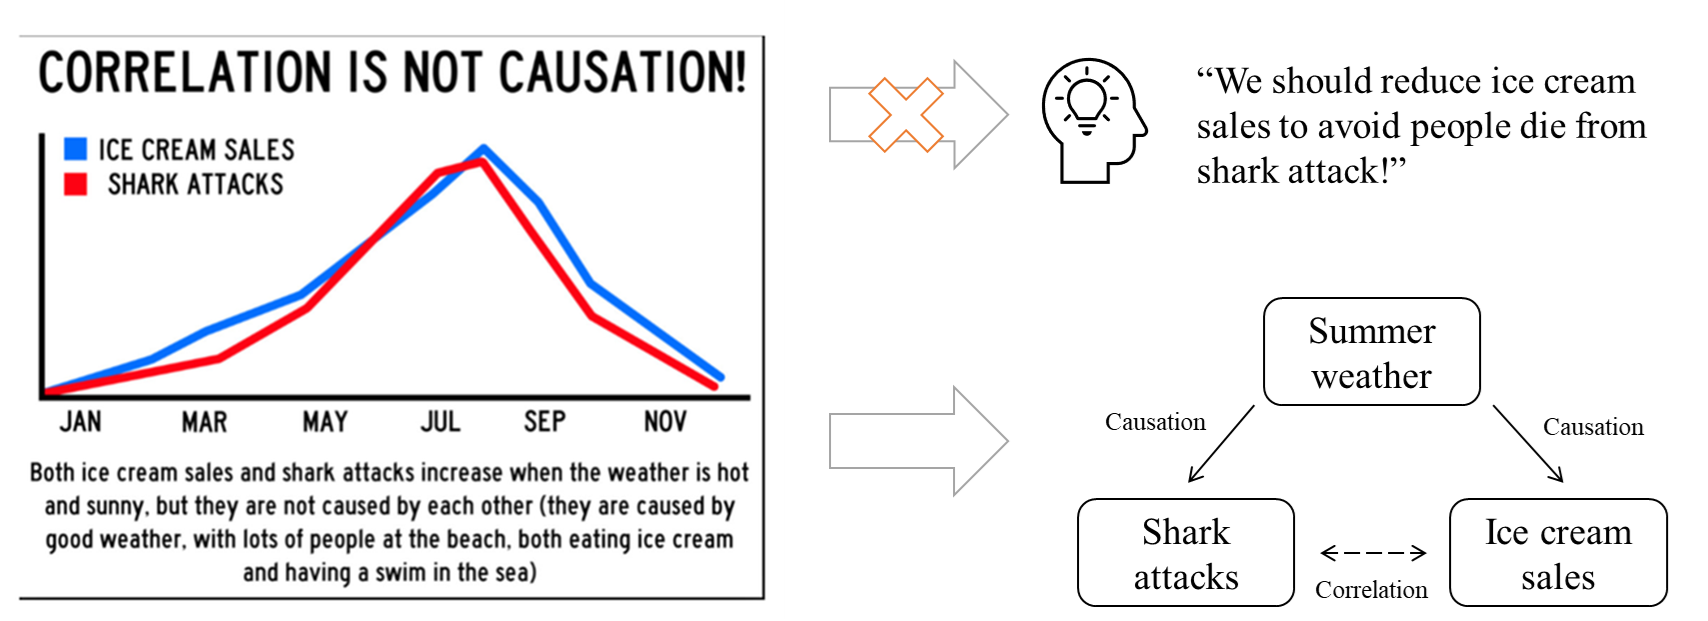

## Causality ladders

*Judea Pearl's ladder of causation*

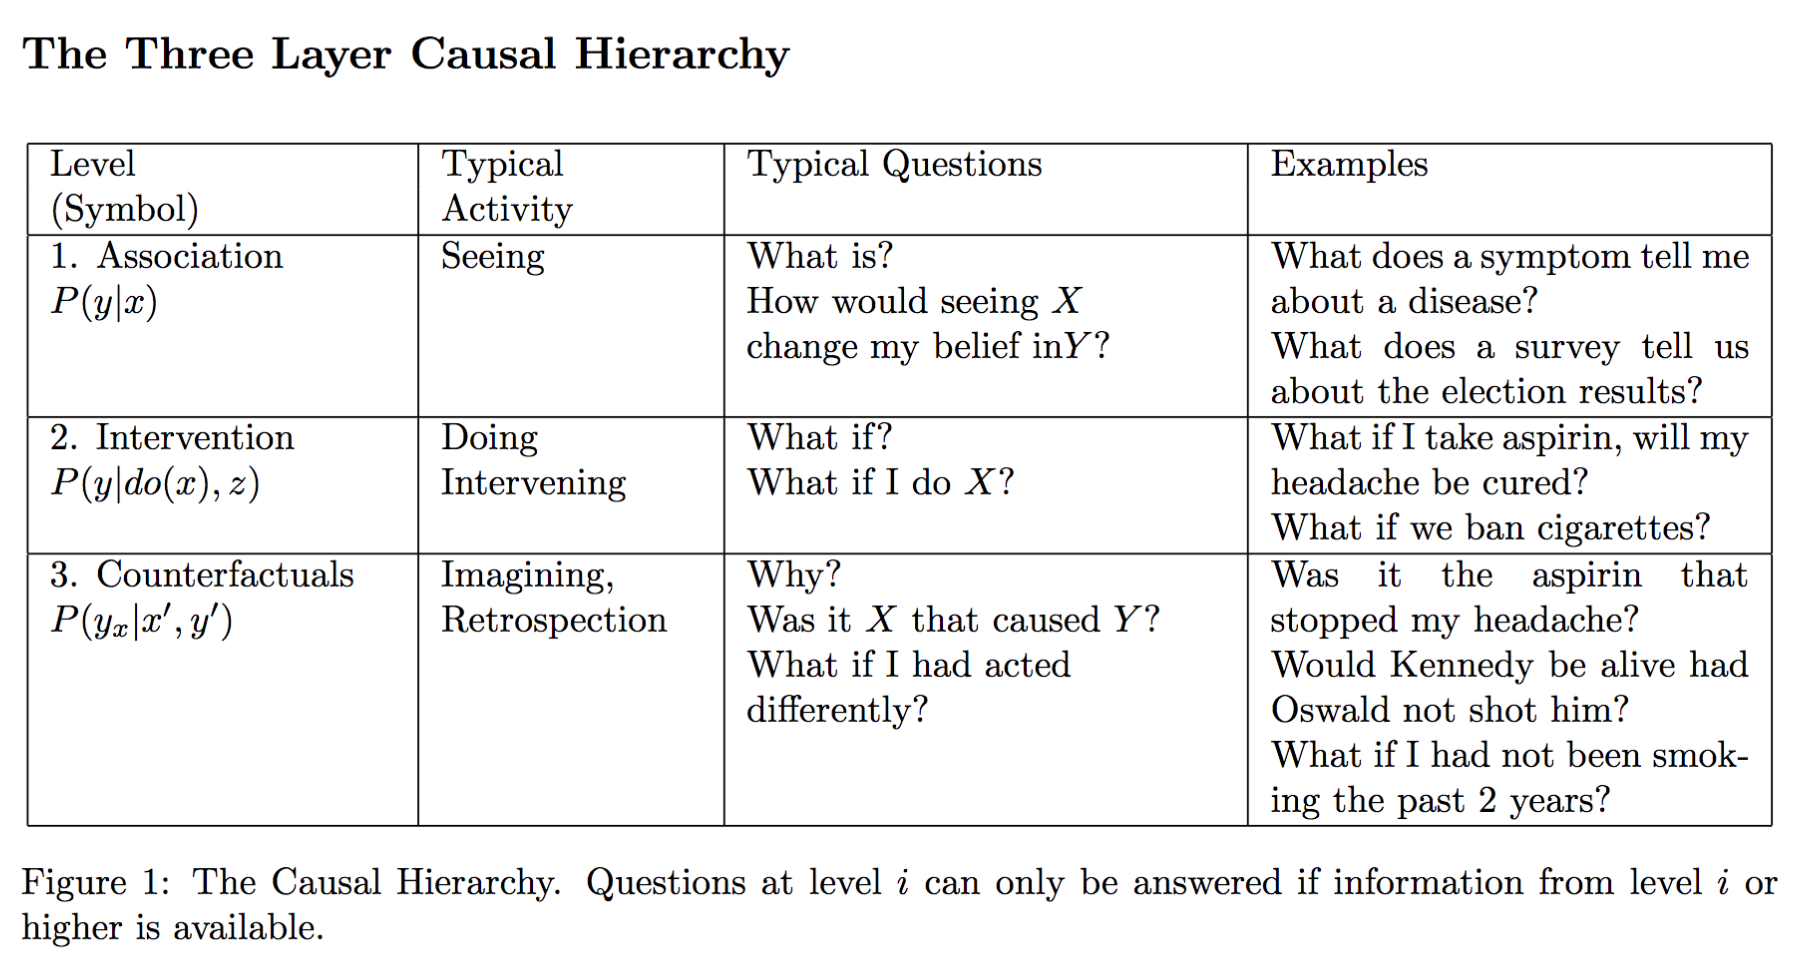

Causal model aims to rule out alternative explanations and minimize biases (spurious association) by controlling for third variables which are supposed to be related to both partaking in the intervention program and output.


## Important rules

In the building domain:

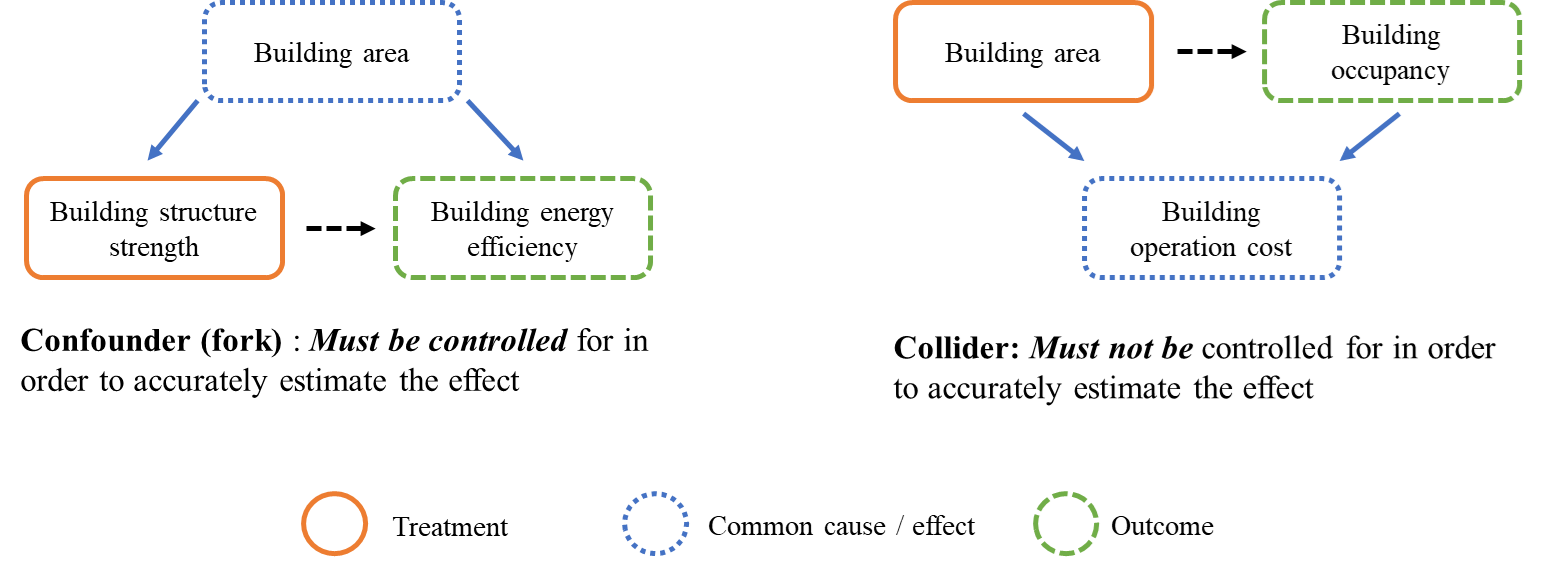

## Example in building domain 

In this example, we will base on a **set of building features** to figure out **how they affect the building's energy efficiency**.

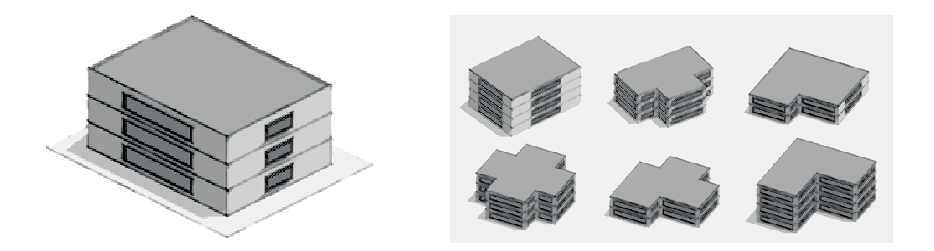

In [20]:
# Example
df_building = pd.read_csv('Building.csv', index_col=0)
df_building.head()
df_building.columns

Index(['Height', 'Volume', 'External_Wall_Area', 'Number_of_Floors',
       'Ground_Floor_Area', 'Window_Area', 'u_Value_Wall',
       'u_Value_Ground_Floor', 'u_Value_Roof', 'u_Value_Internal_Floor',
       'u_Value_Internal_Wall', 'u_Value_Windows', 'g_Value_Windows',
       'Permeability', 'Building_Equipment_Heat_Gain', 'Building_Occupancy',
       'WWR_North', 'WWR_East', 'WWR_West', 'WWR_South', 'WWR',
       'Heating_Load'],
      dtype='object')

<ipython-input-65-b750ec44eb33>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_building.hist(ax = ax)


array([[<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Volume'}>,
        <AxesSubplot:title={'center':'External_Wall_Area'}>,
        <AxesSubplot:title={'center':'Number_of_Floors'}>,
        <AxesSubplot:title={'center':'Ground_Floor_Area'}>],
       [<AxesSubplot:title={'center':'Window_Area'}>,
        <AxesSubplot:title={'center':'u_Value_Wall'}>,
        <AxesSubplot:title={'center':'u_Value_Ground_Floor'}>,
        <AxesSubplot:title={'center':'u_Value_Roof'}>,
        <AxesSubplot:title={'center':'u_Value_Internal_Floor'}>],
       [<AxesSubplot:title={'center':'u_Value_Internal_Wall'}>,
        <AxesSubplot:title={'center':'u_Value_Windows'}>,
        <AxesSubplot:title={'center':'g_Value_Windows'}>,
        <AxesSubplot:title={'center':'Permeability'}>,
        <AxesSubplot:title={'center':'Building_Equipment_Heat_Gain'}>],
       [<AxesSubplot:title={'center':'Building_Occupancy'}>,
        <AxesSubplot:title={'center':'WWR_North'}>,
        

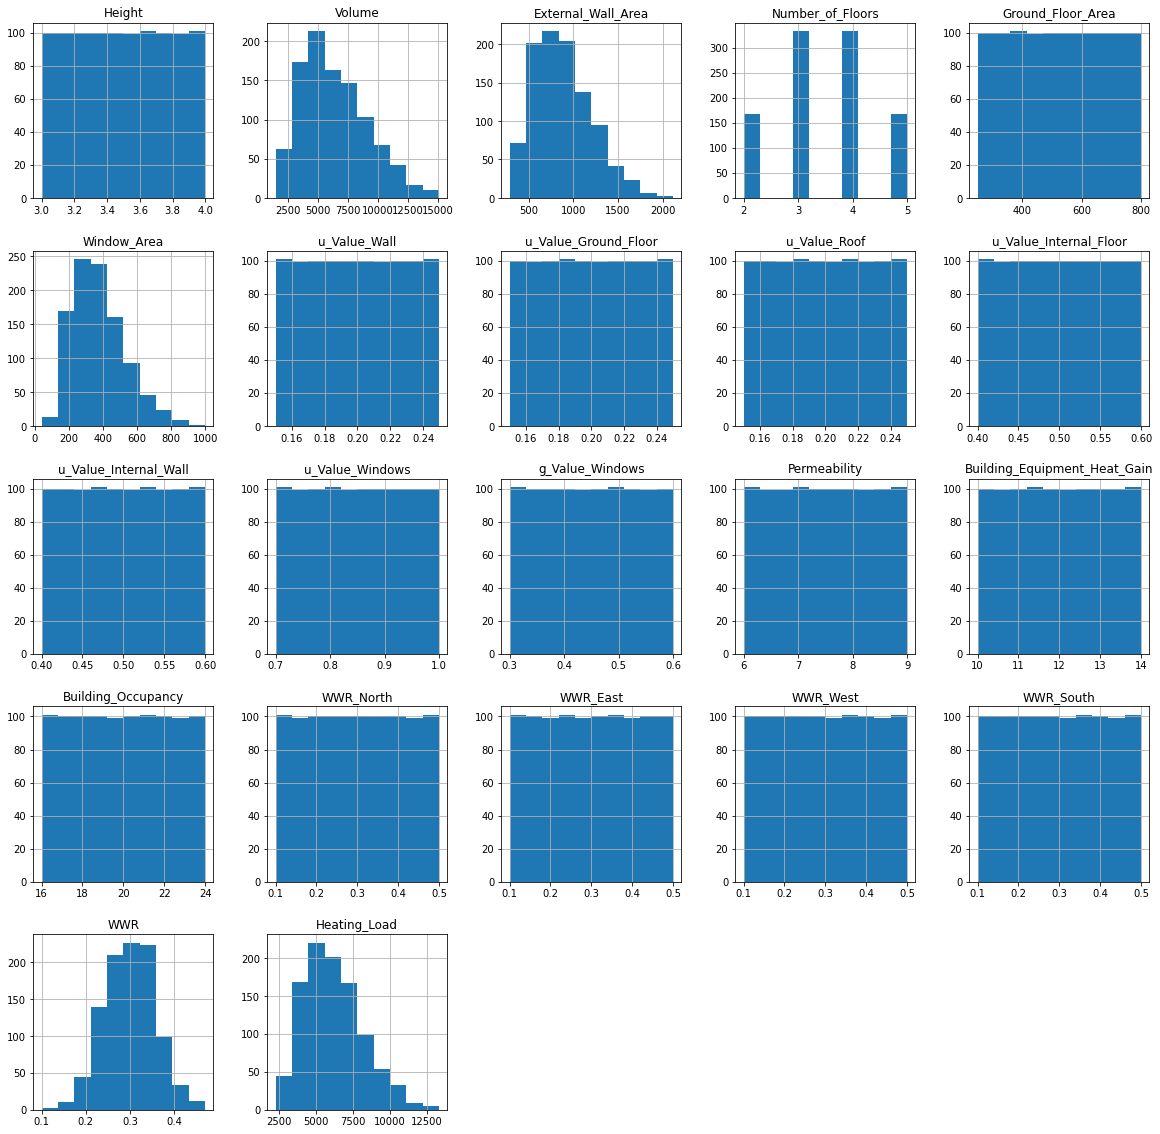

In [65]:
# setting figure size in inches
fig = plt.figure(figsize = (20, 20))
# Get the current Axes instance on the current figure matching the given keyword args
ax = fig.gca()

df_building.hist(ax = ax)

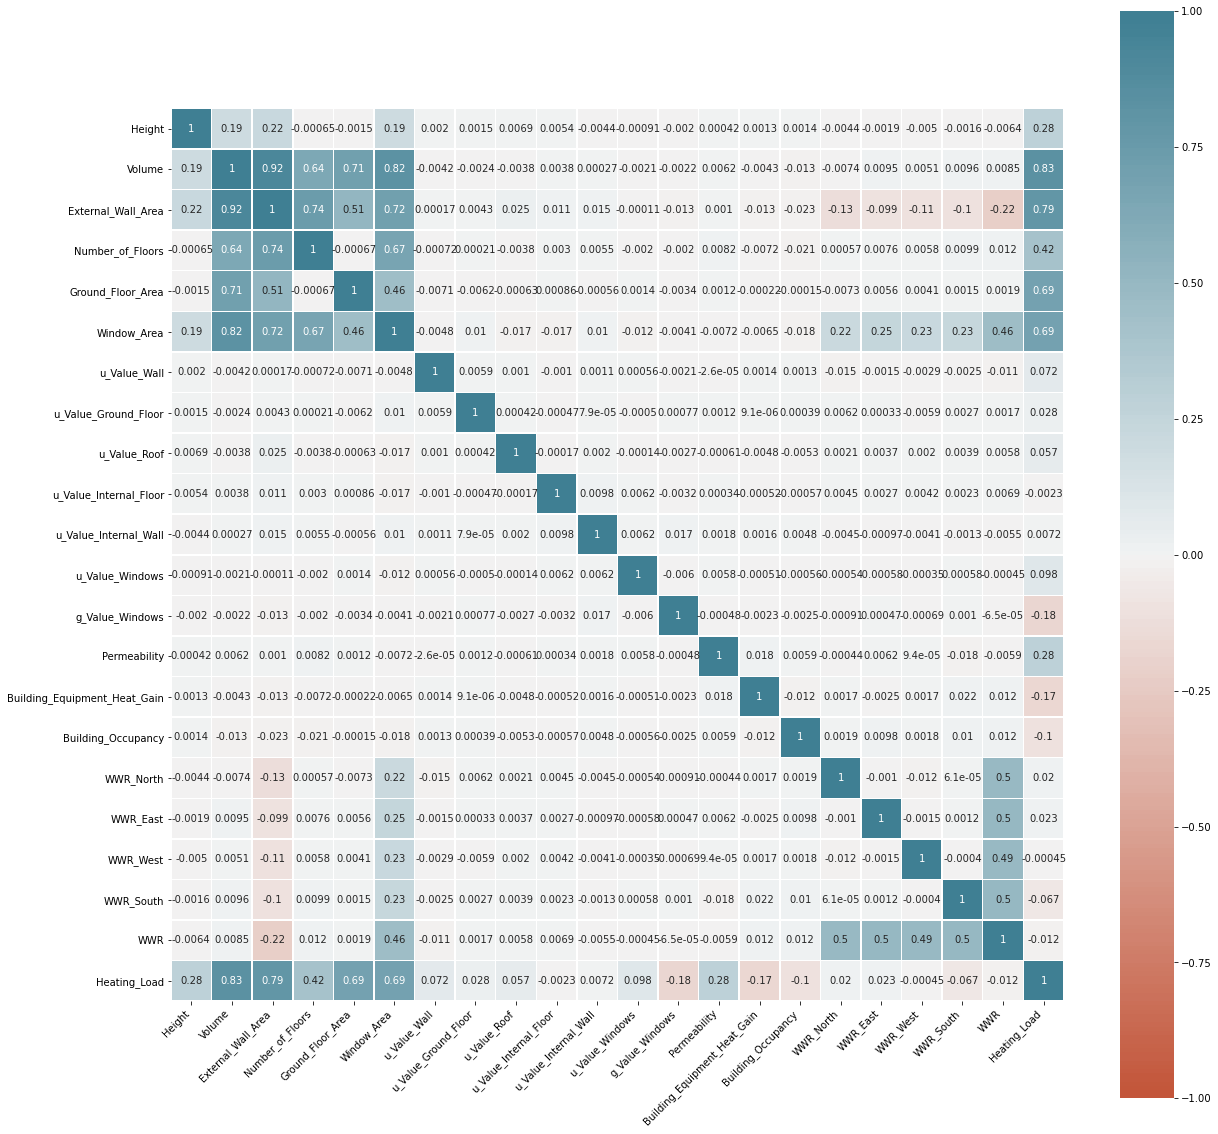

In [80]:
corr_building = df_building.corr()

# setting figure size in inches
fig = plt.figure(figsize = (20, 20))
# Get the current Axes instance on the current figure matching the given keyword args
ax = fig.gca()

# correlation matrix
# Different color options: https://seaborn.pydata.org/tutorial/color_palettes.html
ax = sns.heatmap(
    corr_building, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    linewidths=.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [82]:
corr_pairs = corr_building.unstack().sort_values(kind="quicksort")
corr_pairs

WWR                           External_Wall_Area             -0.219057
External_Wall_Area            WWR                            -0.219057
Heating_Load                  g_Value_Windows                -0.176062
g_Value_Windows               Heating_Load                   -0.176062
Building_Equipment_Heat_Gain  Heating_Load                   -0.171522
Heating_Load                  Building_Equipment_Heat_Gain   -0.171522
WWR_North                     External_Wall_Area             -0.126635
External_Wall_Area            WWR_North                      -0.126635
                              WWR_West                       -0.106829
WWR_West                      External_Wall_Area             -0.106829
Building_Occupancy            Heating_Load                   -0.104369
Heating_Load                  Building_Occupancy             -0.104369
External_Wall_Area            WWR_South                      -0.104123
WWR_South                     External_Wall_Area             -0.104123
Extern

In [83]:
strong_pairs = corr_pairs[(abs(corr_pairs) > 0.5) & (abs(corr_pairs) != 1)]
strong_pairs

WWR                 WWR_East              0.500975
WWR_East            WWR                   0.500975
WWR                 WWR_South             0.502077
WWR_South           WWR                   0.502077
External_Wall_Area  Ground_Floor_Area     0.513269
Ground_Floor_Area   External_Wall_Area    0.513269
Number_of_Floors    Volume                0.641394
Volume              Number_of_Floors      0.641394
Window_Area         Number_of_Floors      0.672386
Number_of_Floors    Window_Area           0.672386
Ground_Floor_Area   Heating_Load          0.689178
Heating_Load        Ground_Floor_Area     0.689178
                    Window_Area           0.692199
Window_Area         Heating_Load          0.692199
Ground_Floor_Area   Volume                0.711742
Volume              Ground_Floor_Area     0.711742
External_Wall_Area  Window_Area           0.716417
Window_Area         External_Wall_Area    0.716417
Number_of_Floors    External_Wall_Area    0.739528
External_Wall_Area  Number_of_F

In [86]:
corr_pairs['Heating_Load'].sort_values(kind="quicksort")

g_Value_Windows                -0.176062
Building_Equipment_Heat_Gain   -0.171522
Building_Occupancy             -0.104369
WWR_South                      -0.066999
WWR                            -0.012051
u_Value_Internal_Floor         -0.002291
WWR_West                       -0.000450
u_Value_Internal_Wall           0.007245
WWR_North                       0.020202
WWR_East                        0.023225
u_Value_Ground_Floor            0.028003
u_Value_Roof                    0.057323
u_Value_Wall                    0.071510
u_Value_Windows                 0.097690
Height                          0.281843
Permeability                    0.284527
Number_of_Floors                0.417979
Ground_Floor_Area               0.689178
Window_Area                     0.692199
External_Wall_Area              0.793918
Volume                          0.831697
Heating_Load                    1.000000
dtype: float64

How can we answer questions like: <br>
- **"What if I change my building height from 3m to 3.2m, how will the heating load change?"**<br>
or<br>
- **"What if I change my window area from 3m to 3.2m, how will the heating load change?"**

- Draw a causal skeleton by our domain knowledge.
- Make sure all your input features are independent with each other (no causation).

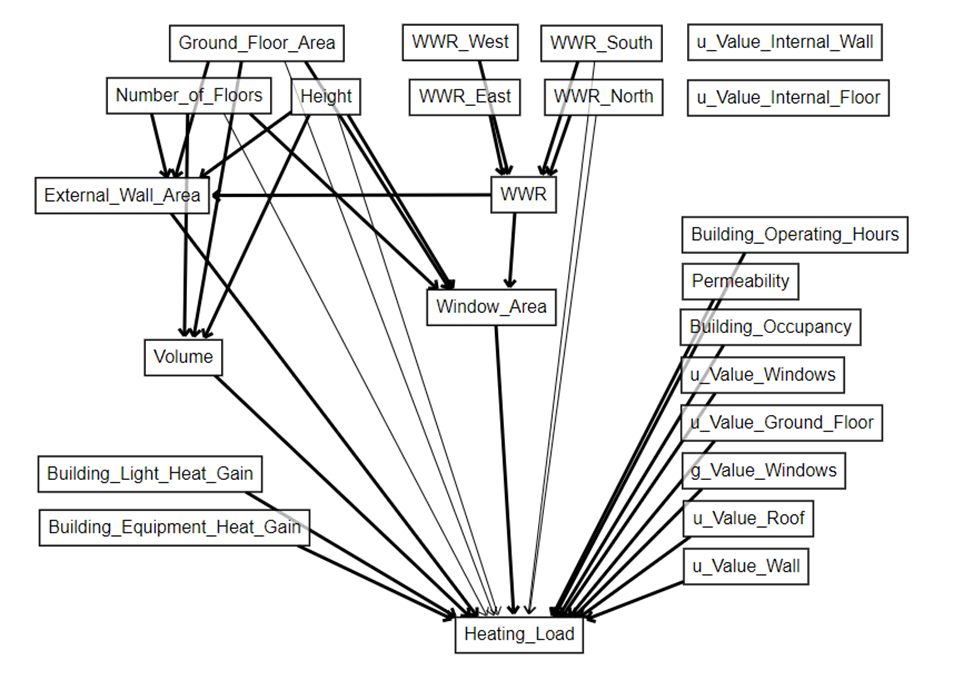

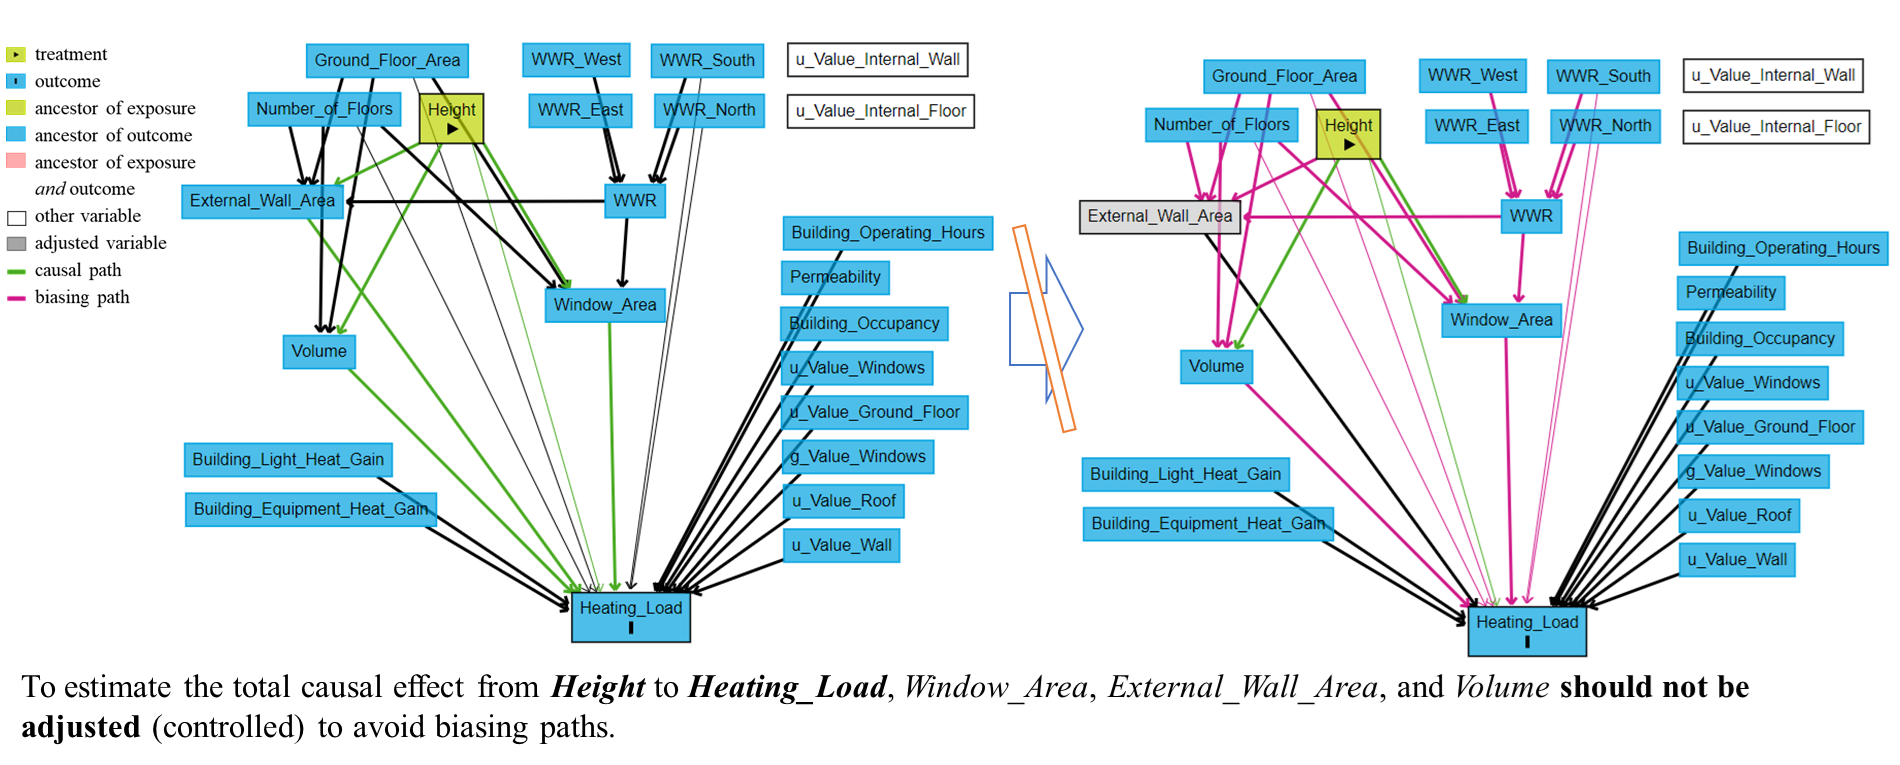

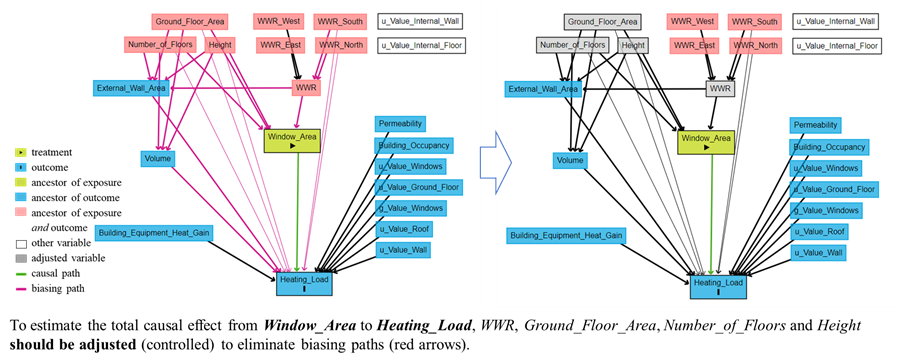